In [7]:
import os
import pandas as pd
pd.set_option('display.max_rows', 200)  

import traffic_color
import importlib
importlib.reload(traffic_color)
from traffic_color import get_df_speed, get_df_coord, get_traffic_color, get_df_color, get_df_traffic

In [9]:
# Get result of Distance Matrix API (speed in traffic)
df_speed = get_df_speed()

# Get result of Traffic Layer API (color in traffic)
df_coord = get_df_coord()
df_color = get_df_color(df_coord)

# Merge two above results
df_traffic = get_df_traffic(df_speed, df_color)

print(f'df_speed = {df_speed.shape}')
print(f'df_coord = {df_coord.shape}')
print(f'df_color = {df_color.shape}')
print(f'df_traffic = {df_traffic.shape}')

df_speed = (288, 18)
df_coord = (252, 7)
df_color = (252, 9)
df_traffic = (288, 22)


In [6]:
# Define the custom order for the 'color' column
color_order = ['green', 'yellow', 'red', 'darkred']

# Convert the 'color' column to a categorical type with the custom order
df_traffic['color'] = pd.Categorical(df_traffic['color'], categories=color_order, ordered=True)

# Calculate the percentage of speed in traffic compared to normal speed
df_traffic['pct_speed_traffic'] = df_traffic['speed_in_traffic']/df_traffic['speed']

In [282]:
df_traffic.groupby(['type', 'color'])[['speed', 'speed_in_traffic', 'pct_speed_traffic', 'datetime_delta']].describe().T

C:\Users\h\AppData\Local\Temp\ipykernel_23860\2829816661.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_traffic.groupby(['type', 'color'])[['speed', 'speed_in_traffic', 'pct_speed_traffic', 'datetime_delta']].describe().T


type                        cao tốc                                     \
color                         green      yellow         red    darkred   
speed             count   16.000000    8.000000    7.000000   1.000000   
                  mean    48.716199   43.581176   49.107692  47.040000   
                  std      4.906889    2.864178    3.531257        NaN   
                  min     41.505882   41.505882   47.040000  47.040000   
                  25%     47.040000   41.505882   47.040000  47.040000   
                  50%     47.040000   41.505882   47.040000  47.040000   
                  75%     54.276923   47.040000   50.658462  47.040000   
                  max     54.276923   47.040000   54.276923  47.040000   
speed_in_traffic  count   16.000000    8.000000    7.000000   1.000000   
                  mean    45.811403   35.666768   22.051340  11.025000   
                  std      6.990178   11.334719    4.397270        NaN   
                  min     33.600000   17.640000   16.409302  11.025000   
                  25%     40.929412   28.521196   20.160000  11.025000   
                  50%     45.570000   38.392941   21.381818  11.025000   
                  75%     50.400000   44.835000   22.785000  11.025000   
                  max     58.800000   47.040000   30.678261  11.025000   
pct_speed_traffic count   16.000000    8.000000    7.000000   1.000000   
                  mean     0.939199    0.817076    0.449712   0.234375   
                  std      0.096239    0.256813    0.080491        NaN   
                  min      0.714286    0.425000    0.302326   0.234375   
                  25%      0.891641    0.621943    0.428571   0.234375   
                  50%      0.933036    0.866176    0.454545   0.234375   
                  75%      0.958333    1.015625    0.484375   0.234375   
                  max      1.153846    1.133333    0.565217   0.234375   
datetime_delta    count   16.000000    8.000000    7.000000   1.000000   
                  mean   126.687500  171.375000  177.000000  34.000000   
                  std    130.760707  158.553225   40.841156        NaN   
                  min     18.000000   33.000000  121.000000  34.000000   
                  25%     29.500000   40.500000  152.500000  34.000000   
                  50%     43.500000  127.000000  190.000000  34.000000   
                  75%    197.250000  250.750000  192.500000  34.000000   
                  max    470.000000  465.000000  238.000000  34.000000   

type                       vành đai                                      \
color                         green      yellow         red     darkred   
speed             count   42.000000    8.000000    6.000000    8.000000   
                  mean    29.569885   29.575491   31.174831   35.341447   
                  std      4.004200    3.485228    5.192280    4.445029   
                  min     26.000000   26.800000   26.000000   26.800000   
                  25%     26.800000   27.969231   27.969231   35.703947   
                  50%     27.553846   27.969231   28.834615   37.705263   
                  75%     30.521739   29.905435   35.703947   37.705263   
                  max     37.705263   37.705263   37.705263   37.705263   
speed_in_traffic  count   42.000000    8.000000    6.000000    8.000000   
                  mean    27.899398   19.388553   15.708584   11.652232   
                  std      7.167770    6.513394    7.822845    6.371649   
                  min     11.862295    8.587952    8.288372    6.758491   
                  25%     24.795443   15.586364   11.663054    7.910952   
                  50%     28.512000   20.375199   13.579170    9.859955   
                  75%     31.797036   23.692708   16.338823   11.922493   
                  max     42.141176   26.933333   30.521739   26.533333   
pct_speed_traffic count   42.000000    8.000000    6.000000    8.000000   
                  mean     0.949709    0.668268    0.53254

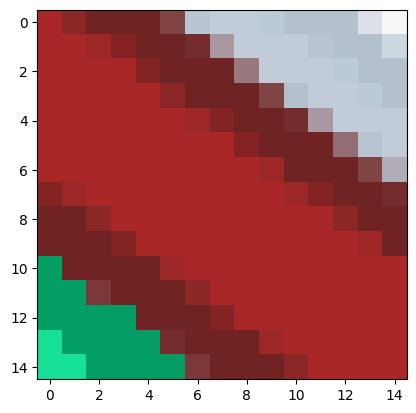

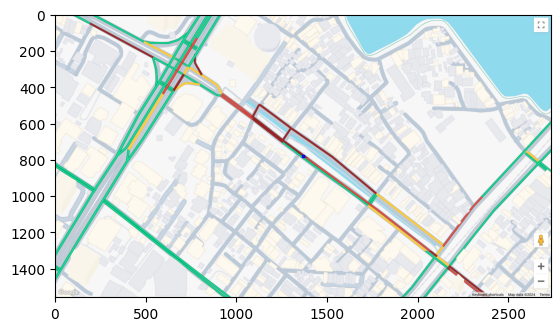

'darkred'

In [270]:
current_path = os.path.dirname(os.path.abspath(__name__))
api_result_path = f'{current_path}/../api_result'
get_traffic_color(f'{api_result_path}/traffic_api\\1724919284_image.png', df_coord, edge=15, plot=True)